# Price prediction - Boston Housing Data

**Relevant Information:**

   Concerns housing values in suburbs of Boston.

**Attribute Information:**
1. **`CRIM`**      per capita crime rate by town
2. **`ZN`**        proportion of residential land zoned for lots over  25,000 sq.ft.
3. **`INDUS`**     proportion of non-retail business acres per town
4. **`CHAS`**      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. **`NOX`**       nitric oxides concentration (parts per 10 million)
6. **`RM`**        average number of rooms per dwelling
7. **`AGE`**       proportion of owner-occupied units built prior to 1940
8. **`DIS`**       weighted distances to five Boston employment centres
9. **`RAD`**       index of accessibility to radial highways
10. **`TAX`**      full-value property-tax rate per 10,000 USD
11. **`PTRATIO`**  pupil-teacher ratio by town 
12. **`B`**        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town    
13. **`LSTAT`**    % lower status of the population
14. **`MEDV`**     Median value of owner-occupied homes in 1000 USD  

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from matplotlib import style

In [2]:
Boston=load_boston()

In [3]:
Boston.keys() # Dataset info

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
Boston['data']

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [5]:
Boston['target'].shape #  houses' price

(506,)

In [6]:
Boston['feature_names'] # Columns name

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

# Create DataFrame

In [7]:
df_boston=pd.DataFrame(data=Boston['data'],columns=Boston['feature_names'])

In [8]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


**NOTE:** It's necessary to add the column "Target" that contains the prices of the houses

In [9]:
df_boston["PRICE"] =  Boston.target

In [10]:
df_boston.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [11]:
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


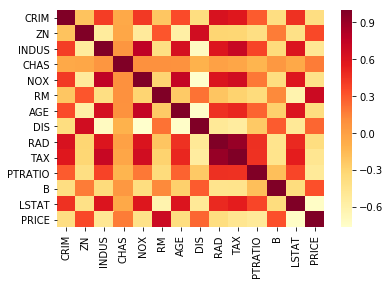

In [12]:
sns.heatmap(df_boston.corr(),cmap='YlOrRd')

In [13]:
df_boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


# Columns correlation 

We can to evidence a good correlation between the following columns :

* RAD Vs TAX
* INDUS Vs NOX
* NOX Vs DIS
* PRICE Vs RM

# Price Vs RM

/home/alexbonella2806/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alexbonella2806/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


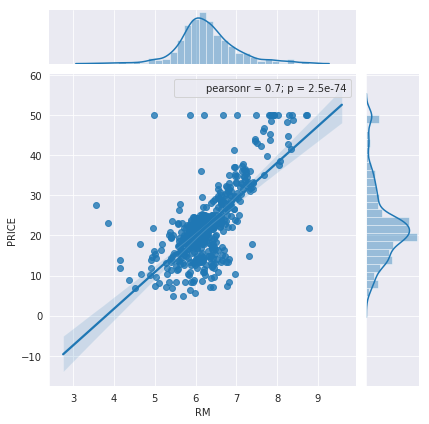

In [14]:
sns.set_style(style='darkgrid')
sns.jointplot(y="PRICE",x="RM",data=df_boston,kind="reg",stat_func=pearsonr)

#  NOX vs DIS

/home/alexbonella2806/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alexbonella2806/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


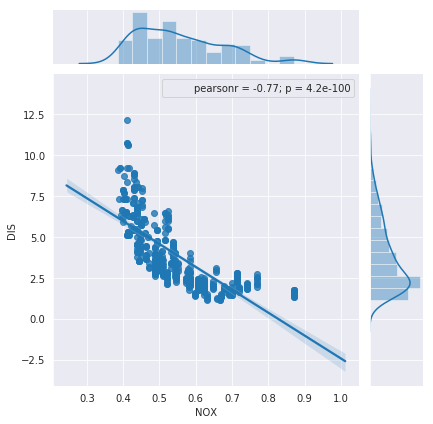

In [15]:
sns.set_style(style='darkgrid')
sns.jointplot(y="DIS",x="NOX",data=df_boston,kind="reg",stat_func=pearsonr)

# Data Classified 

In this step we will perform the separation of our data in X and Y variables, for this we must take into account the following:
 
* X = All columns except "PRICE
* y = Price of homes

In [16]:
df_boston.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0


In [17]:
X=df_boston.drop(columns='PRICE')
y=df_boston['PRICE']

# Split training data and test data  

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#  Linear Regression model 

In [19]:
lin_model=LinearRegression() 
lin_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#  Model accuracy with training data and test data 

In [20]:
accur_train = lin_model.score(X_train, y_train)
accur_real = lin_model.score(X_test, y_test)

In [21]:
print('  accuracy  train : ', + accur_train)
print('\n')
print('  accuracy  real : ', + accur_real)

  accuracy  train :  0.7434997532004697


  accuracy  real :  0.7112260057484916


# Model prediction and error 

In [22]:
prediction = lin_model.predict(X_test)
error = np.mean((y_test - prediction))
print('Error = ',error)

Error =  0.07773628465360649


# Metrics 

In [23]:
from sklearn import metrics

In [24]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 3.162709871457419
MSE: 21.517444231177336
RMSE: 4.638689926172835


# Coeficcients analysis

In [25]:
Coeficientes= pd.DataFrame(lin_model.coef_,X.columns) 
Coeficientes.columns = ['Coeficientes'] 
Coeficientes

,Coeficientes
CRIM,-0.133470
ZN,0.035809
INDUS,0.049523
CHAS,3.119835
NOX,-15.417061
RM,4.057199
AGE,-0.010821
DIS,-1.385998
RAD,0.242727
TAX,-0.008702


**ANALYSIS:** As can we observe the variables that have the most effect on the price of houses are the variable ***`CHAS`***, ***`NOX`***  and the variable ***`RM`***, what tells us The price of the house is influenced by the number of rooms and if it has a river nearby.
    

# **FINAL**